<a href="https://colab.research.google.com/github/Ashishgupta45/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


<img target="_blank" src="https://user-images.githubusercontent.com/32620288/138472917-dcd9bcf6-a005-455a-8273-4d164d8e32e7.jpg" width=500; height=300>

### **Description of columns from dataset documentation**

There are 25 variables:

• ID: ID of each client.

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit.

• SEX: Gender (1=male, 2=female)

• EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).

• MARRIAGE: Marital status (1=married, 2=single, 3=others).

• AGE: Age in years.

• PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 
9=payment delay for nine months and above)

• PAY_2: Repayment status in August, 2005 (scale same as above)

• PAY_3: Repayment status in July, 2005 (scale same as above)

• PAY_4: Repayment status in June, 2005 (scale same as above)

• PAY_5: Repayment status in May, 2005 (scale same as above)

• PAY_6: Repayment status in April, 2005 (scale same as above)

• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

• BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

• default payment next month: Default payment (1=yes, 0=no)

**Import libraries**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
creditcard_df = pd.read_excel('/content/drive/My Drive/Ashish  ML Classification/default of credit card clients.xlsx')

In [ ]:
# Print the first 5 rows of the dataframe.
creditcard_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
creditcard_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
print('Dimension of Credit card Data:', creditcard_df.shape)

Dimension of Credit card Data: (30000, 25)


In [ ]:
creditcard_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# duplicate
print('Duplicate of Credit card Data:', len(creditcard_df[creditcard_df.duplicated()]))          

Duplicate of Credit card Data: 0


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
creditcard_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
creditcard_df.isnull().count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

### **Check for missing values**

In [ ]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in creditcard_df.columns if creditcard_df[feature].isnull().sum()>1 and creditcard_df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(creditcard_df[feature].isnull().mean(),4)))

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in creditcard_df.columns:
    print('{} : {}'.format(col,creditcard_df[col].unique()))

ID : [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL : [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]
AGE : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 : [ 2 -1  0 -2  1  3  4  8  7  5  6]
P

In [ ]:
print(creditcard_df.apply(lambda col: col.unique()))

ID                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
LIMIT_BAL                     [20000, 120000, 90000, 50000, 500000, 100000, ...
SEX                                                                      [2, 1]
EDUCATION                                                 [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                           [1, 2, 3, 0]
AGE                           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0                                       [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2                                       [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3                                       [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4                                       [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5                                          [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6                                          [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
BILL_AMT1                     [3913, 268

In [ ]:
# Identifying the unique number of values in the dataset
creditcard_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

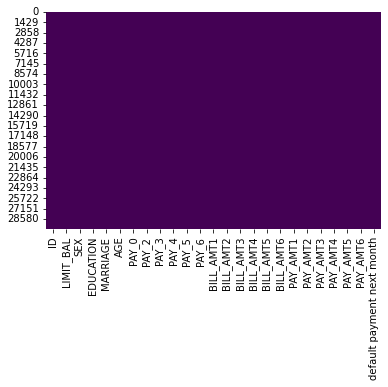

In [ ]:
sns.heatmap(creditcard_df.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Viewing the data statistics
creditcard_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# About 22% customers had default payment next month

creditcard_df['default payment next month'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

In [ ]:
# We can rename PAY_0 to PAY_1 becasue BILL_AMT and PAY_AMT are also starting from 1
creditcard_df = creditcard_df.rename(columns={'PAY_0':'PAY_1'})

print(f'Column names are :', list(creditcard_df.columns))

Column names are : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [ ]:
# SEX column's distribution. 1: male; 2: female
# No undocumented SEX code

print('SEX column distribution 1: Male; 2: Female:')
creditcard_df["SEX"].value_counts()

SEX column distribution 1: Male; 2: Female:


2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown)
print('EDUCATION column distribution: 2=University, 1=Graduate school, 3=High school, 5=Unknown, 4=Others, 6=Unknown, 0=Unknown')
creditcard_df["EDUCATION"].unique()

EDUCATION column distribution: 2=University, 1=Graduate school, 3=High school, 5=Unknown, 4=Others, 6=Unknown, 0=Unknown


array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
creditcard_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Change values 0, 5, 6 to 4 as 'Others'
# 1=Graduate school, 2=University, 3=High school, 4=Others

print('EDUCATION column distribution : 2=University, 1=Graduate school, 3=High school, 4=Others')
creditcard_df['EDUCATION']=np.where(creditcard_df['EDUCATION'] == 5, 4, creditcard_df['EDUCATION'])
creditcard_df['EDUCATION']=np.where(creditcard_df['EDUCATION'] == 6, 4, creditcard_df['EDUCATION'])
creditcard_df['EDUCATION']=np.where(creditcard_df['EDUCATION'] == 0, 4, creditcard_df['EDUCATION'])
creditcard_df["EDUCATION"].value_counts()

EDUCATION column distribution : 2=University, 1=Graduate school, 3=High school, 4=Others


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
# Marital Status: (1=Married, 2=Single, 3=Others)

print('Marriage column distribution of Marital Status : 1=Married, 2=Single, 3=Others')
creditcard_df["MARRIAGE"].unique()

Marriage column distribution of Marital Status : 1=Married, 2=Single, 3=Others


array([1, 2, 3, 0])

In [ ]:
print('Marriage column distribution of Marital Status : 2=Single, 1=Married, 3=Others')
creditcard_df["MARRIAGE"].value_counts()

Marriage column distribution of Marital Status : 2=Single, 1=Married, 3=Others


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
# How many customers had "MARRIAGE" status as 0?

creditcard_df["MARRIAGE"].value_counts(normalize=True)*100

2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64

In this **MARRIAGE** column we don't know what is 0 so i'm here going to combined 0 and 3 by changing the value 0 into 3.

In [ ]:
# Combine 0 and 3 as Others

creditcard_df['MARRIAGE']=np.where(creditcard_df['MARRIAGE'] == 0, 3, creditcard_df['MARRIAGE'])

In [ ]:
creditcard_df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
creditcard_df["AGE"].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [ ]:
# copy into a new dataframe object
df_copy = creditcard_df.copy()  
creditcard_df_copy = creditcard_df

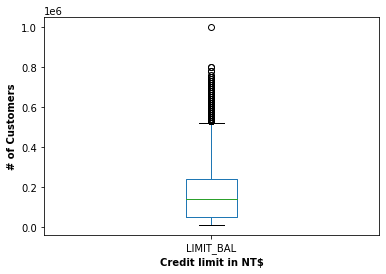

In [ ]:
# Use boxplot to identify any outlier in credit limit

creditcard_df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

**Imputing the outliars**

In [ ]:
def remove_outlier_using_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final_output = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final_output

In [ ]:
creditcard_df["LIMIT_BAL"] = remove_outlier_using_IQR(creditcard_df["LIMIT_BAL"])

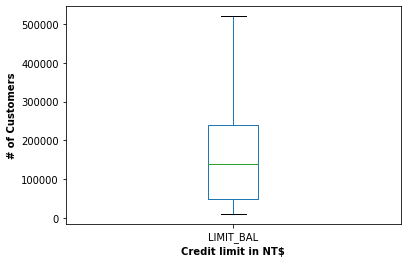

In [ ]:
# Use boxplot to identify any outlier in credit limit

creditcard_df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

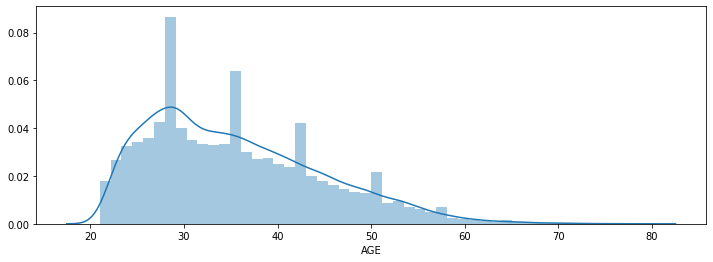

In [ ]:
plt.figure(figsize=(12,4))

sns.distplot(creditcard_df['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [ ]:
creditcard_df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'Default'}, inplace = True)

In [ ]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (creditcard_df.PAY_1 >1) | (creditcard_df.PAY_2 >1) | (creditcard_df.PAY_3 >1) | (creditcard_df.PAY_4 >1) | (creditcard_df.PAY_5 >1) | (creditcard_df.PAY_6 >1)
creditcard_df.loc[def_condition, "HAS_DEF"] = 1
creditcard_df.loc[creditcard_df.HAS_DEF.isna(), "HAS_DEF"] = 0

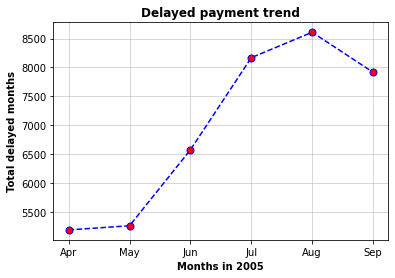

In [ ]:
# Subset a dataframe with the records that have default

has_default = creditcard_df[creditcard_df['HAS_DEF']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend,label="Test",color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=7)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

In [ ]:
'''removing the unwanted features'''

creditcard_df.drop('HAS_DEF', axis=1, inplace=True)

In [ ]:
# Set ID as dataframe index

creditcard_df.set_index('ID', inplace = True)
creditcard_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Distribution by Default**

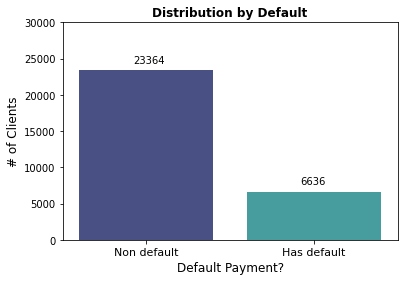

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Default", data=creditcard_df, palette="mako")

plt.xlabel("Default Payment?", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['Non default', 'Has default'], fontsize = 11)
plt.title('Distribution by Default',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

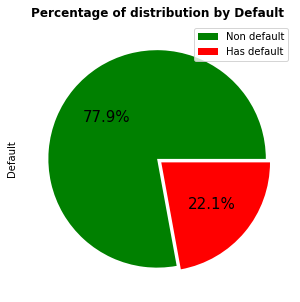

In [ ]:
plt.figure(figsize=(7,5))

creditcard_df['Default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['green','red'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Non default', 'Has default'])
plt.title('Percentage of distribution by Default',weight ='bold')

plt.show()

**Distribution by Sex Category**

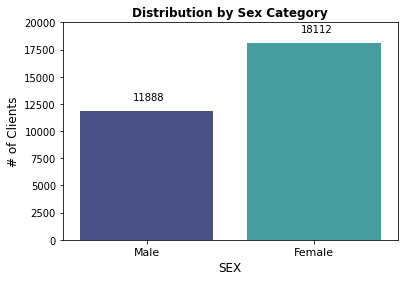

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="SEX", data=creditcard_df, palette="mako")

plt.xlabel("SEX", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.title('Distribution by Sex Category',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

**Default distribution by Sex**

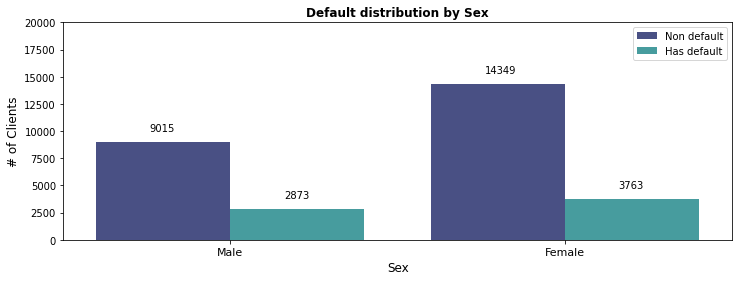

In [ ]:
# Plot a bar chart to visualize default N0. female and male
plt.figure(figsize=(12,4))

ax = sns.countplot(data = creditcard_df, x = 'SEX', hue="Default", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

**Distribution by Education Level**

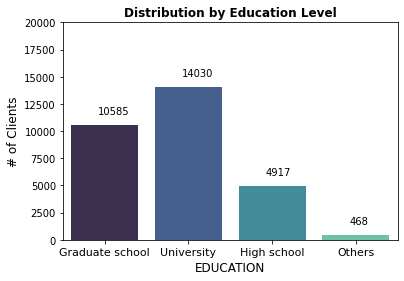

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="EDUCATION", data=creditcard_df, palette="mako")

plt.xlabel("EDUCATION", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
#plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
plt.title('Distribution by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

**Default distribution by Education Level**

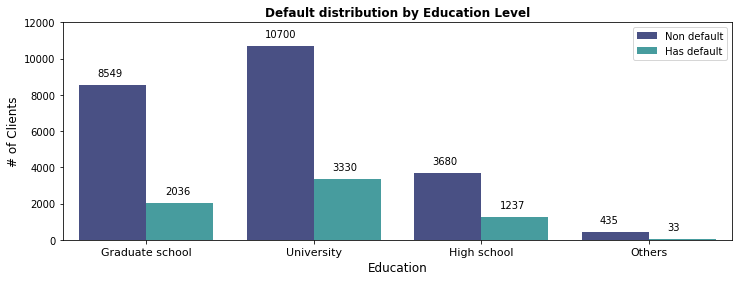

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = creditcard_df, x = 'EDUCATION', hue="Default", palette = 'mako')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

**Education level distribution by Sex**

In [ ]:
creditcard_df.groupby(by=['EDUCATION', 'SEX'])['Default'].value_counts(normalize = True)*100

EDUCATION  SEX  Default
1          1    0          79.191548
                1          20.808452
           2    0          81.864869
                1          18.135131
2          1    0          73.799777
                1          26.200223
           2    0          77.795749
                1          22.204251
3          1    0          72.613065
                1          27.386935
           2    0          76.358046
                1          23.641954
4          1    0          91.764706
                1           8.235294
           2    0          93.624161
                1           6.375839
Name: Default, dtype: float64

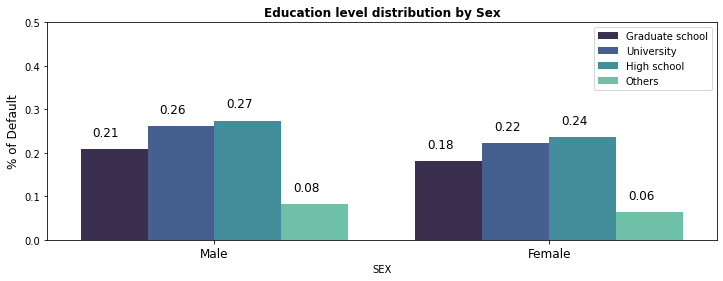

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "EDUCATION", data = creditcard_df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.legend(labels=['Graduate school', 'University', 'High school', 'Others'])
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Education level distribution by Sex',weight ='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

#### Distribution by Marital Status

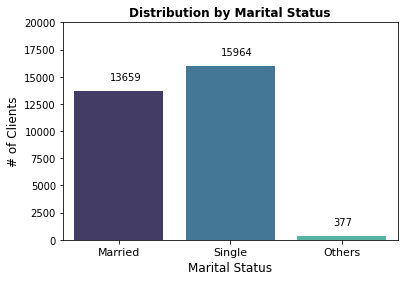

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="MARRIAGE", data=creditcard_df, palette="mako")

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
#plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)
plt.title('Distribution by Marital Status',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

**Default distribution by marital status**

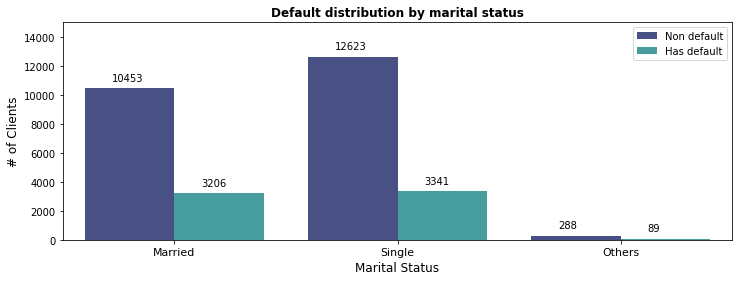

In [ ]:
# Plot a bar chart to visualize Has-default and non-default distribution by marital status 
plt.figure(figsize=(12,4))

ax = sns.countplot(data = creditcard_df, x = 'MARRIAGE', hue="Default", palette = 'mako')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by marital status',weight ='bold')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

In [ ]:
creditcard_df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)

MARRIAGE  SEX  Default
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.710345
               1          0.289655
          2    0          0.797414
               1          0.202586
Name: Default, dtype: float64

**Distribution marital status by Sex**

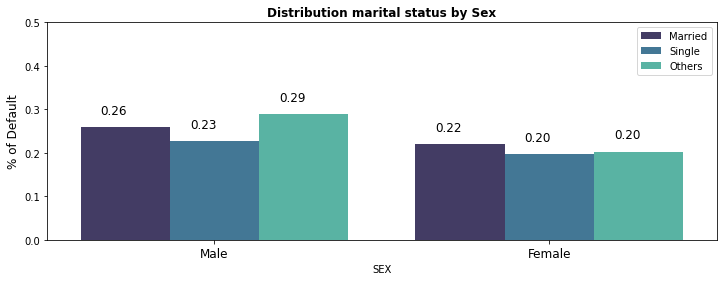

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = creditcard_df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.legend(labels=['Married', 'Single', 'Others'])
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Distribution marital status by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [ ]:
#Creating group of Age 
creditcard_df['Age_group'] = pd.cut(creditcard_df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(creditcard_df['Age_group'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: Age_group, dtype: int64


In [ ]:
creditcard_df['Default'].groupby(creditcard_df['Age_group']).value_counts(normalize = True)*100

Age_group  Default
(20, 25]   0          73.340222
           1          26.659778
(25, 30]   0          79.851582
           1          20.148418
(30, 35]   0          80.572809
           1          19.427191
(35, 40]   0          78.381127
           1          21.618873
(40, 50]   0          76.702748
           1          23.297252
(50, 60]   0          74.762143
           1          25.237857
(60, 80]   0          73.161765
           1          26.838235
Name: Default, dtype: float64

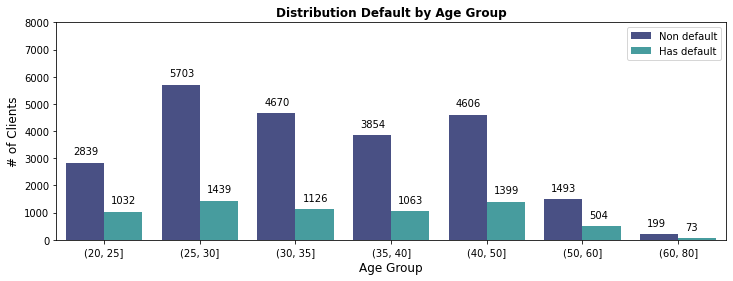

In [ ]:
# Plot a stacked bar chart to visualize default and non-default by age
plt.figure(figsize=(12,4))

creditcard_df['Age_group'] = creditcard_df['Age_group'].astype('str')
Age_group_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = creditcard_df, x = 'Age_group', hue="Default", palette = 'mako', order = Age_group_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Distribution Default by Age Group',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

* Amount of Given Credit (LIMIT_BAL)

In [ ]:
creditcard_df['LimitBal'] = pd.cut(creditcard_df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(creditcard_df['LimitBal'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]      39
Name: LimitBal, dtype: int64


In [ ]:
creditcard_df['Default'].groupby(creditcard_df['LimitBal']).value_counts(normalize = True)*100

LimitBal           Default
(5000, 50000]      0          68.212611
                   1          31.787389
(50000, 100000]    0          74.201576
                   1          25.798424
(100000, 150000]   0          78.856996
                   1          21.143004
(150000, 200000]   0          82.151835
                   1          17.848165
(200000, 300000]   0          83.949397
                   1          16.050603
(300000, 400000]   0          85.936934
                   1          14.063066
(400000, 500000]   0          87.859825
                   1          12.140175
(500000, 1100000]  0          89.743590
                   1          10.256410
Name: Default, dtype: float64

In [ ]:
plt.figure(figsize=(14,4))

creditcard_df['LimitBal'] = creditcard_df['LimitBal'].astype('str')
LimitBal_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = creditcard_df, x = 'LimitBal', hue="Default", palette = 'mako', order = LimitBal_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)
plt.legend(labels=['No default', 'Has default'])
plt.title('Distribution Default by Amount of Given Credit',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [ ]:
creditcard_df.groupby(by=['SEX', 'LimitBal'])['Default'].value_counts(normalize = True)

SEX  LimitBal               Default
1    (100000.0, 150000.0]   0          0.756659
                            1          0.243341
     (150000.0, 200000.0]   0          0.784381
                            1          0.215619
     (200000.0, 300000.0]   0          0.824561
                            1          0.175439
     (300000.0, 400000.0]   0          0.857399
                            1          0.142601
     (400000.0, 500000.0]   0          0.866022
                            1          0.133978
     (5000.0, 50000.0]      0          0.680268
                            1          0.319732
     (50000.0, 100000.0]    0          0.719975
                            1          0.280025
     (500000.0, 1100000.0]  0          0.857143
                            1          0.142857
     nan                    0          0.906667
                            1          0.093333
2    (100000.0, 150000.0]   0          0.806208
                            1          0.193792
    

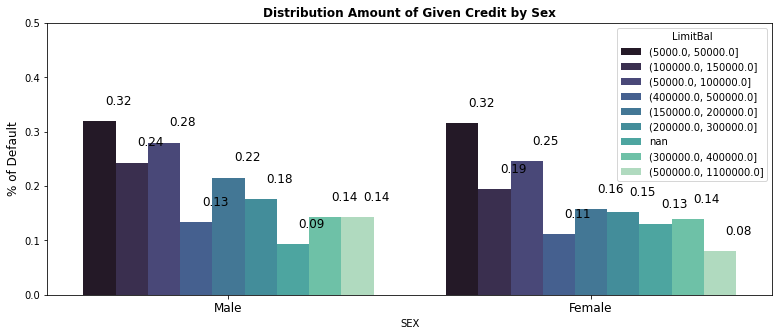

In [ ]:
plt.figure(figsize=(13,5))

ax = sns.barplot(x = "SEX", y = "Default", hue = "LimitBal", data = creditcard_df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [ ]:
creditcard_df.groupby(by=['MARRIAGE', 'LimitBal'])['Default'].value_counts(normalize = True)*100

MARRIAGE  LimitBal               Default
1         (100000.0, 150000.0]   0           77.330126
                                 1           22.669874
          (150000.0, 200000.0]   0           80.156658
                                 1           19.843342
          (200000.0, 300000.0]   0           81.903643
                                 1           18.096357
          (300000.0, 400000.0]   0           85.575589
                                 1           14.424411
          (400000.0, 500000.0]   0           86.555556
                                 1           13.444444
          (5000.0, 50000.0]      0           65.117845
                                 1           34.882155
          (50000.0, 100000.0]    0           71.394799
                                 1           28.605201
          (500000.0, 1100000.0]  0           94.736842
                                 1            5.263158
          nan                    0           80.487805
                        

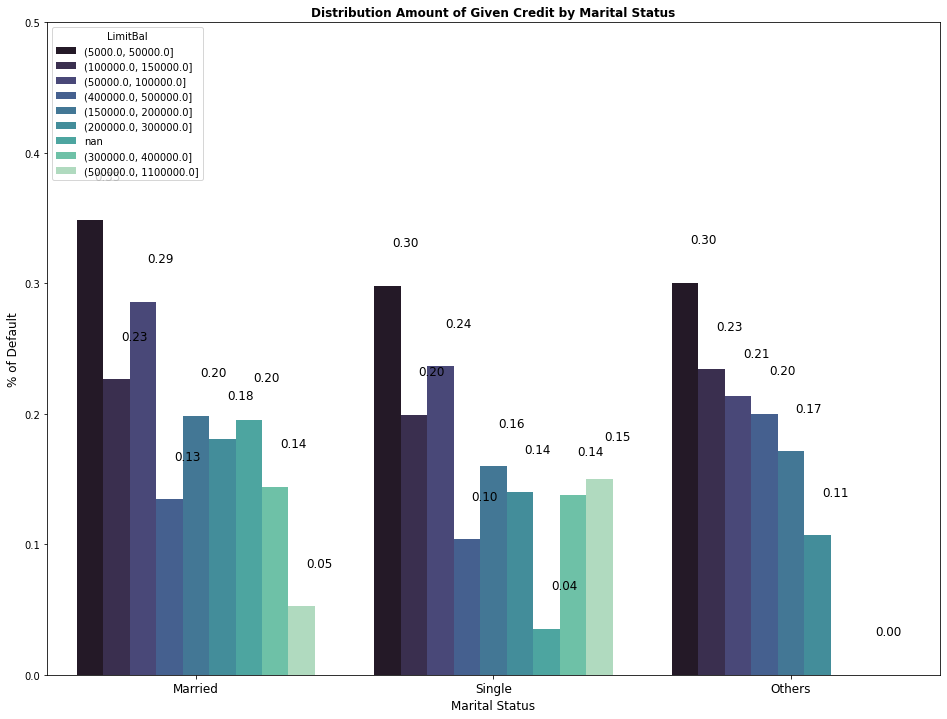

In [ ]:
plt.figure(figsize=(16,12))

ax = sns.barplot(x = "MARRIAGE", y = "Default", hue = "LimitBal", data = creditcard_df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.xlabel("Marital Status", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Marital Status',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)
plt.show()

In [ ]:
creditcard_df.groupby(by=['EDUCATION', 'LimitBal'])['Default'].value_counts(normalize = True)*100

EDUCATION  LimitBal               Default
1          (100000.0, 150000.0]   0           78.257687
                                  1           21.742313
           (150000.0, 200000.0]   0           82.121573
                                  1           17.878427
           (200000.0, 300000.0]   0           83.972720
                                                ...    
4          (50000.0, 100000.0]    0           90.163934
                                  1            9.836066
           (500000.0, 1100000.0]  0          100.000000
           nan                    0           75.000000
                                  1           25.000000
Name: Default, Length: 68, dtype: float64

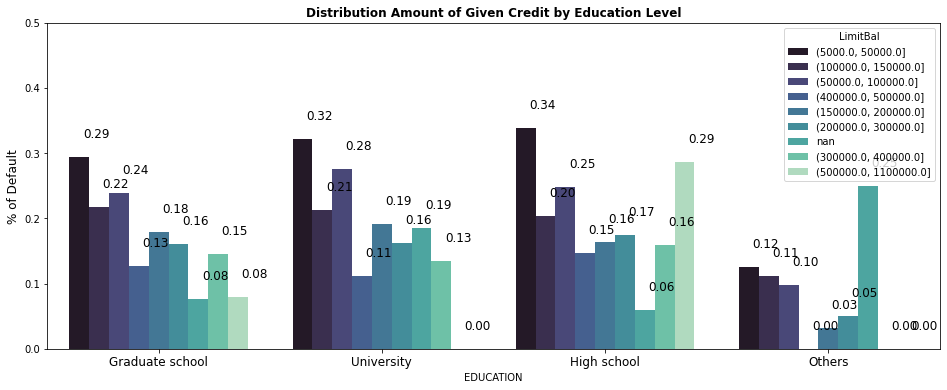

In [ ]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x = "EDUCATION", y = "Default", hue = "LimitBal", data = creditcard_df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [ ]:
creditcard_df.groupby(by=['Age_group', 'LimitBal'])['Default'].value_counts(normalize = True)*100

Age_group  LimitBal               Default
(20, 25]   (100000.0, 150000.0]   0           79.710145
                                  1           20.289855
           (150000.0, 200000.0]   0           85.714286
                                  1           14.285714
           (200000.0, 300000.0]   0           81.879195
                                                ...    
(60, 80]   (5000.0, 50000.0]      1           36.538462
           (50000.0, 100000.0]    0           75.609756
                                  1           24.390244
           (500000.0, 1100000.0]  0          100.000000
           nan                    0          100.000000
Name: Default, Length: 118, dtype: float64

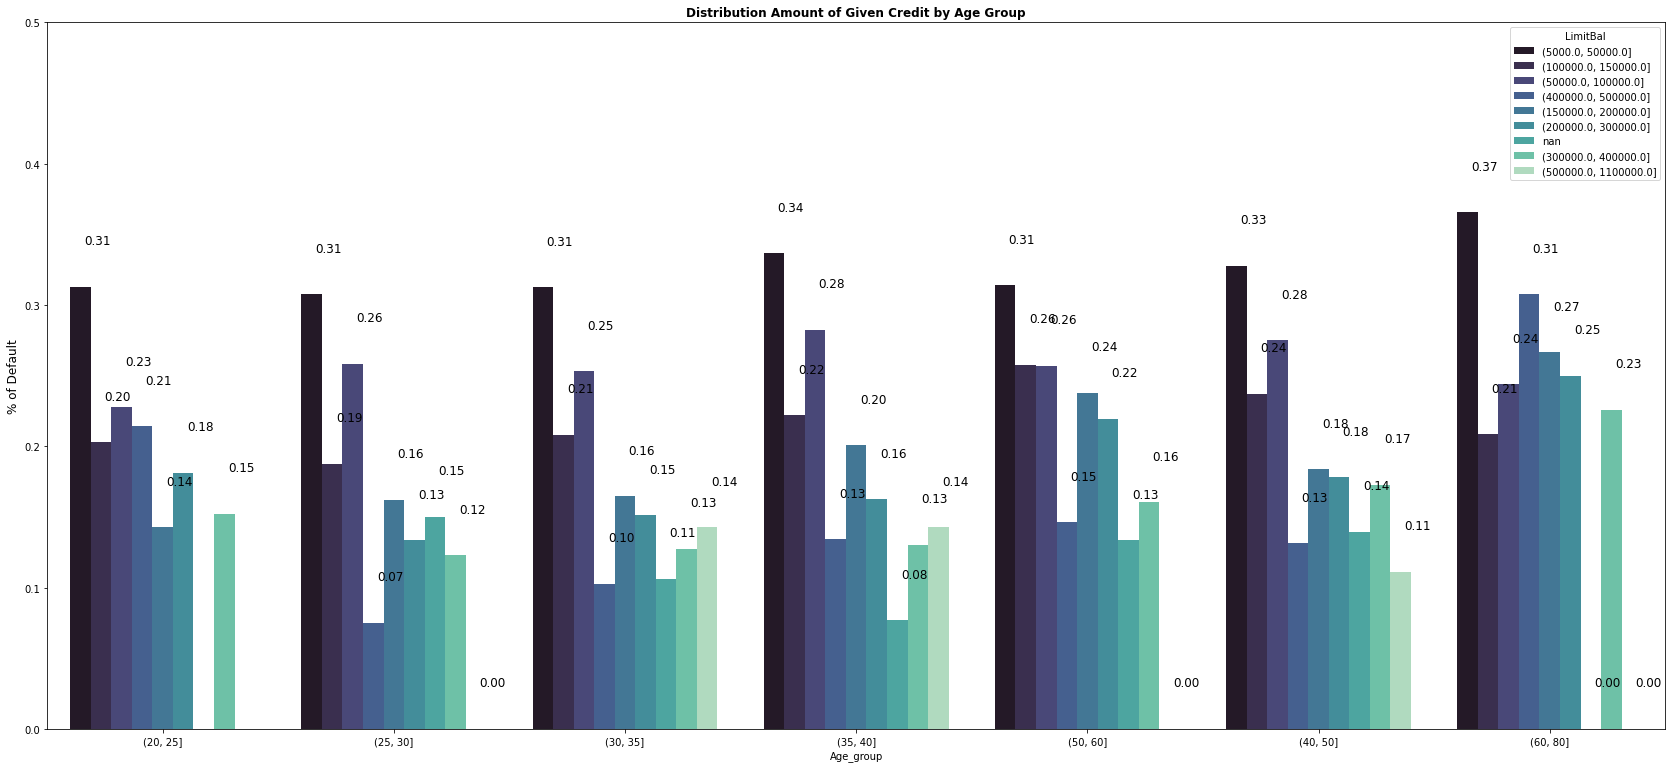

In [ ]:
plt.figure(figsize=(29,13))

ax = sns.barplot(x = "Age_group", y = "Default", hue = "LimitBal", data = creditcard_df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.title('Distribution Amount of Given Credit by Age Group',weight ='bold')


for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

* Repayment status

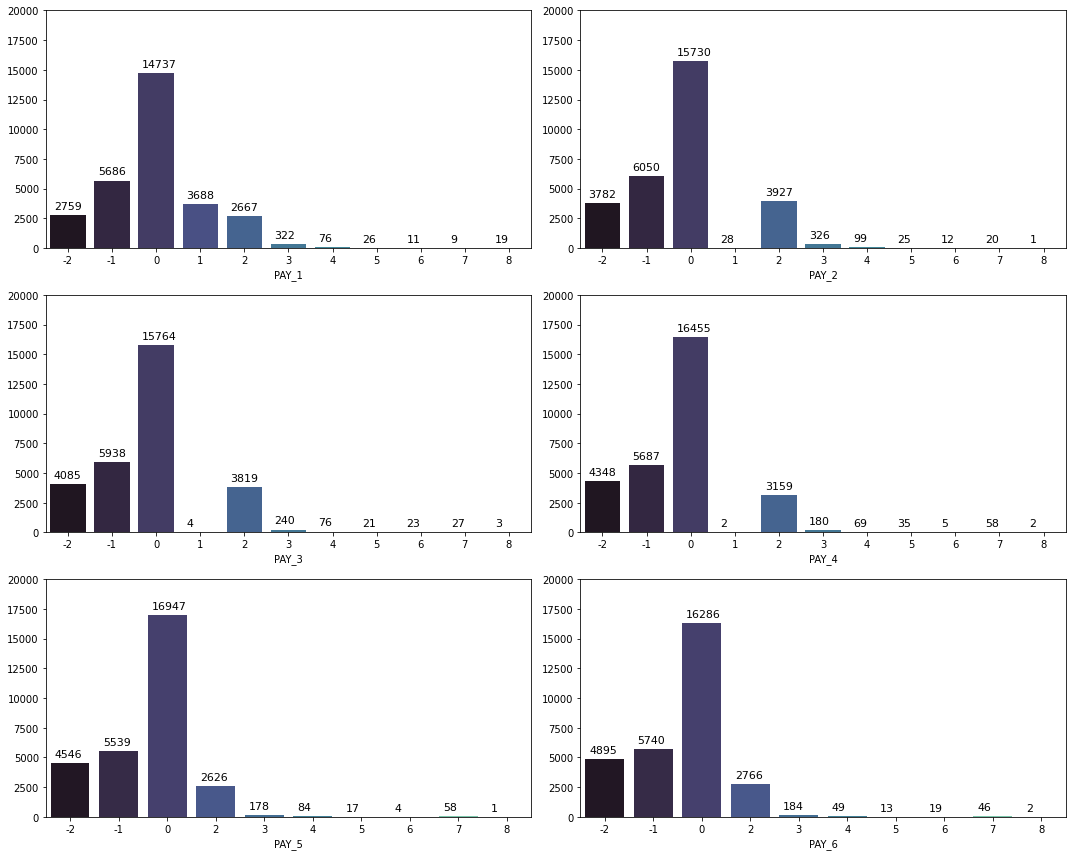

In [ ]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(creditcard_df.loc[:,col], palette = 'mako')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

* Amount of bill statement 

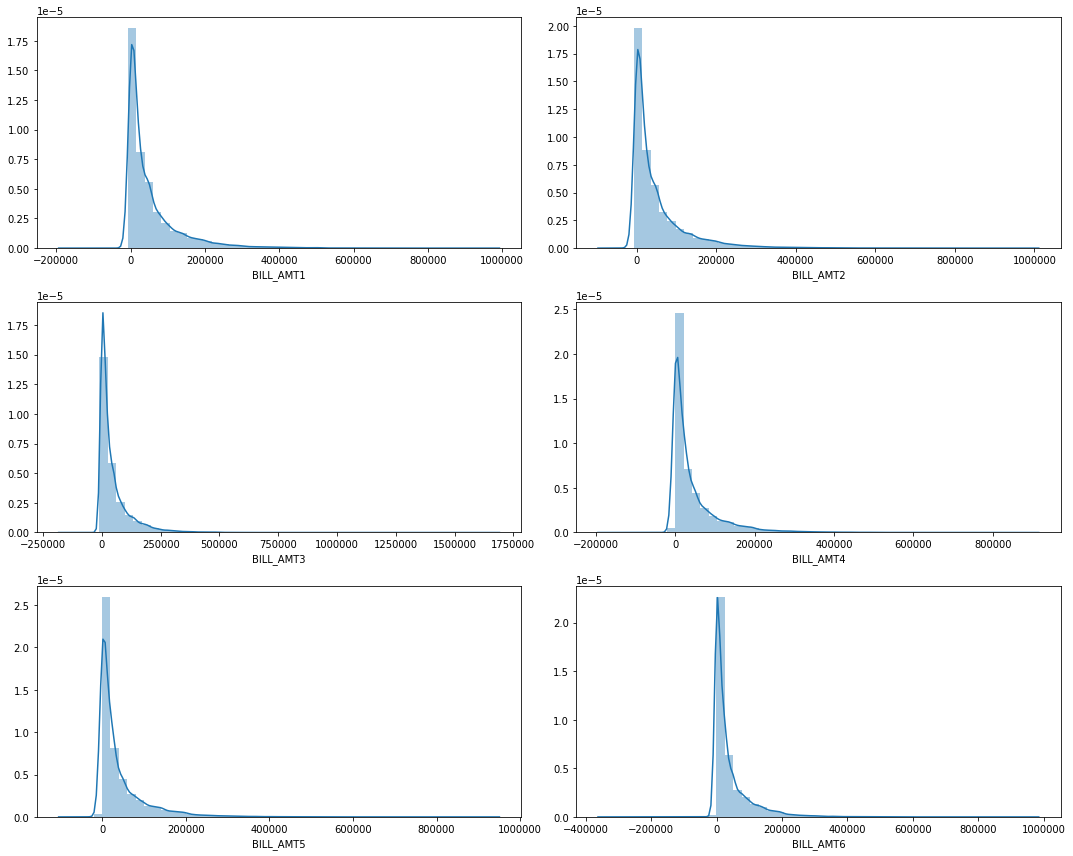

In [ ]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(creditcard_df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation    
    plt.ylabel('')
    plt.tight_layout()

plt.show()

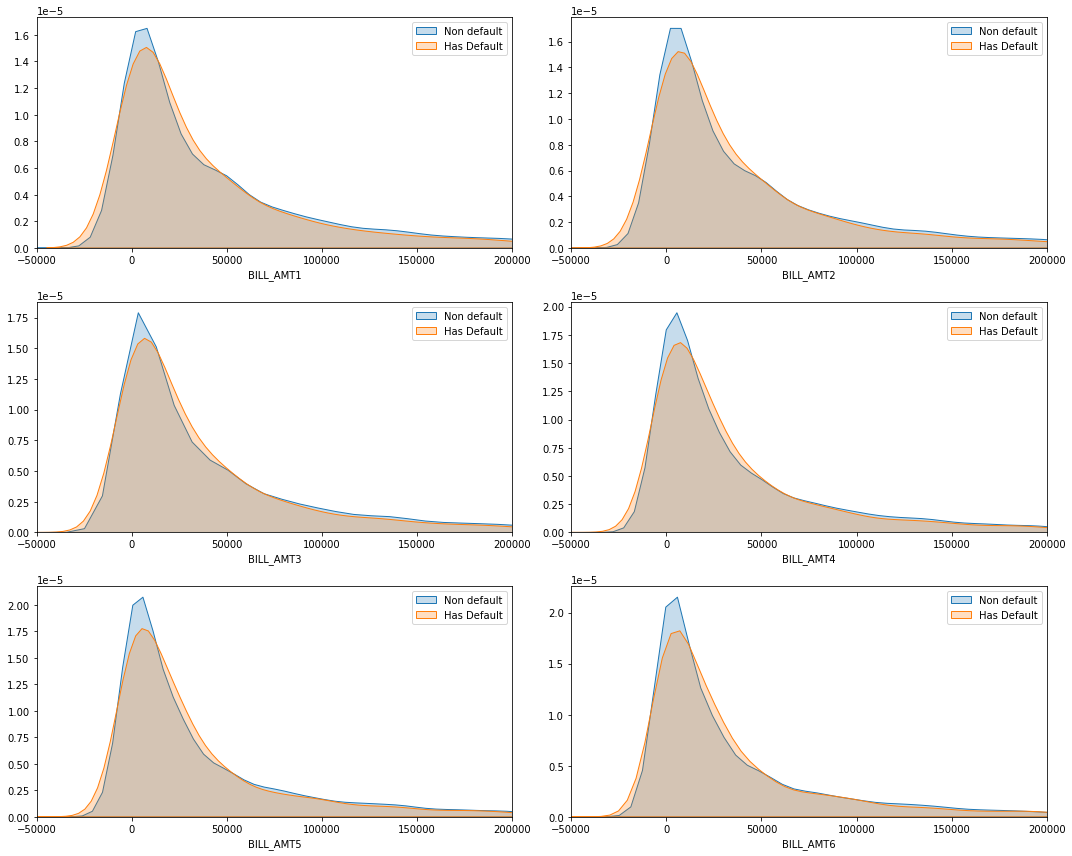

In [ ]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(creditcard_df.loc[(creditcard_df['Default'] == 0), col], label = 'Non default', shade = True)
    sns.kdeplot(creditcard_df.loc[(creditcard_df['Default'] == 1), col], label = 'Has Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [ ]:
'''removing the unwanted features'''

creditcard_df.drop('Age_group', axis=1, inplace=True)
creditcard_df.drop('LimitBal', axis=1, inplace=True)

Default
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

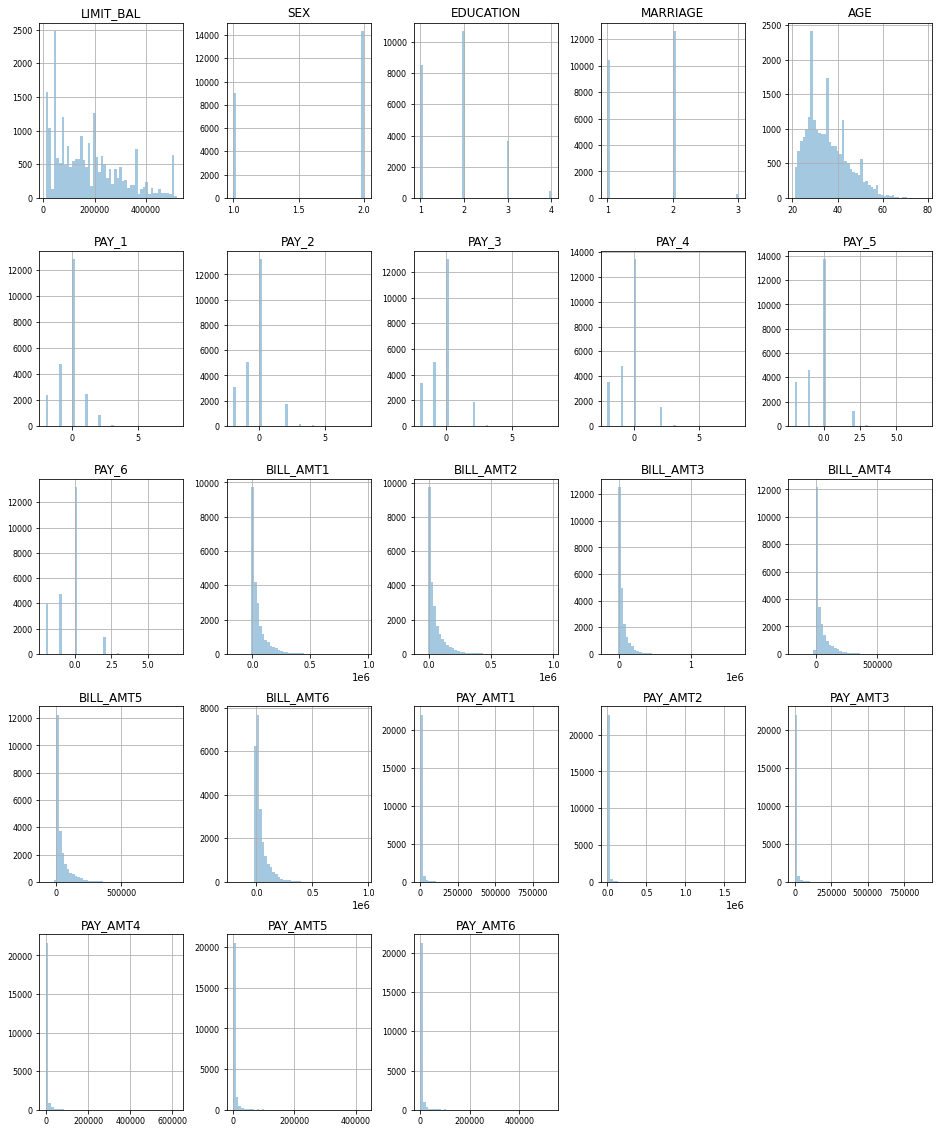

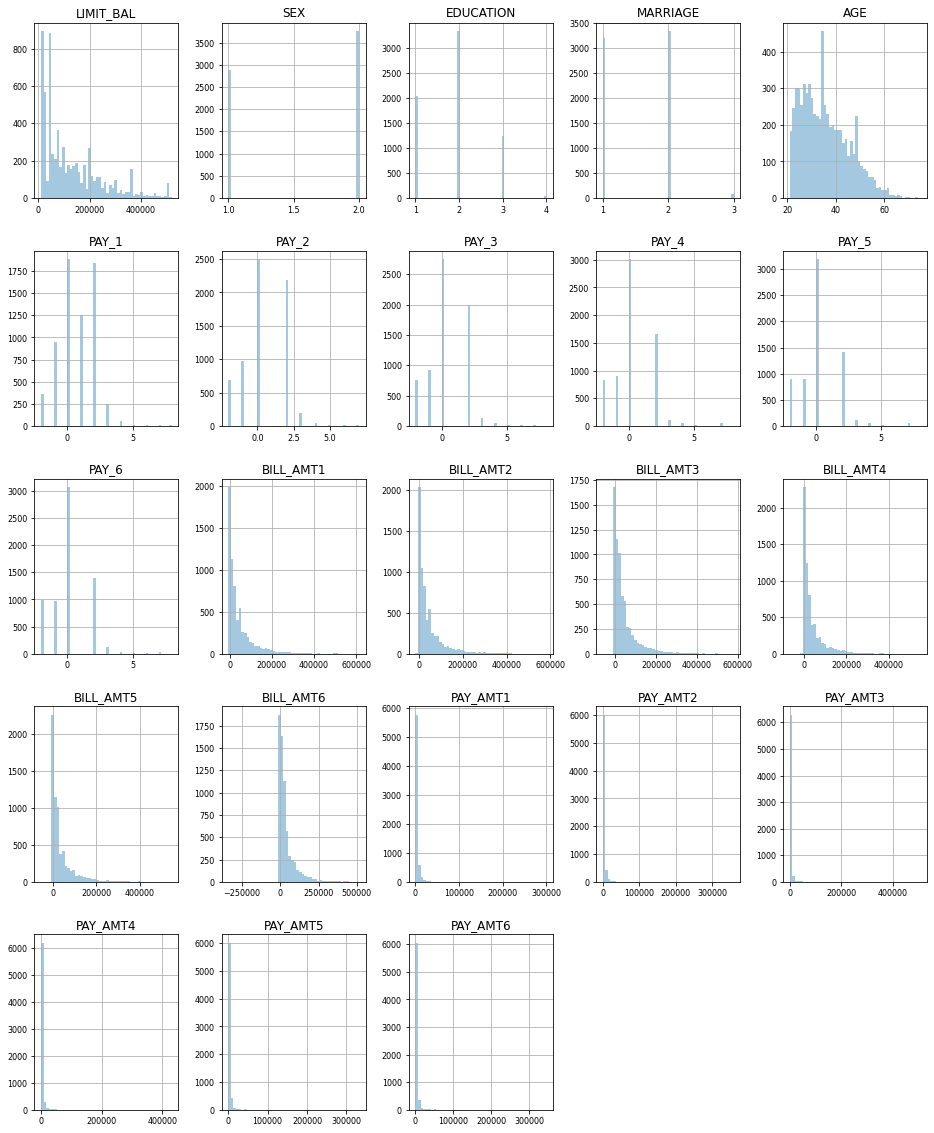

In [ ]:
''' Visualising the variables by grouping them by class '''

creditcard_df.groupby('Default').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)


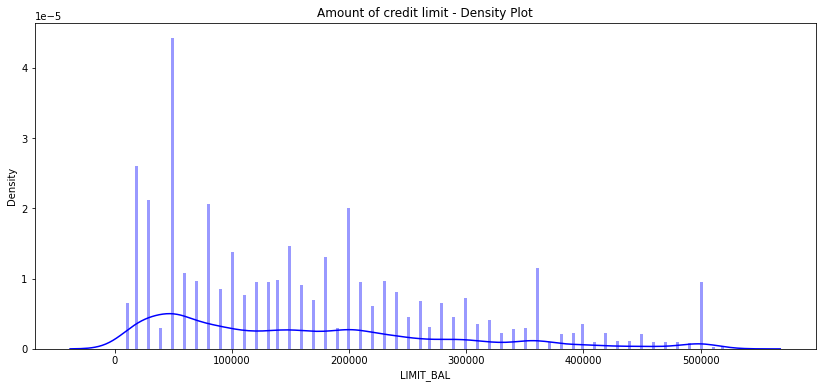

In [ ]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.distplot(creditcard_df['LIMIT_BAL'],kde=True,bins=200, color="blue")

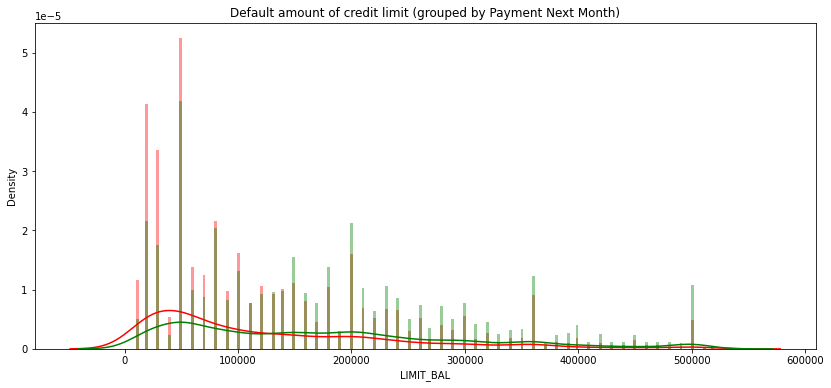

In [ ]:
class_0 = creditcard_df.loc[creditcard_df['Default'] == 0]["LIMIT_BAL"]
class_1 = creditcard_df.loc[creditcard_df['Default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit (grouped by Payment Next Month)')
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")

### Correlation matrix

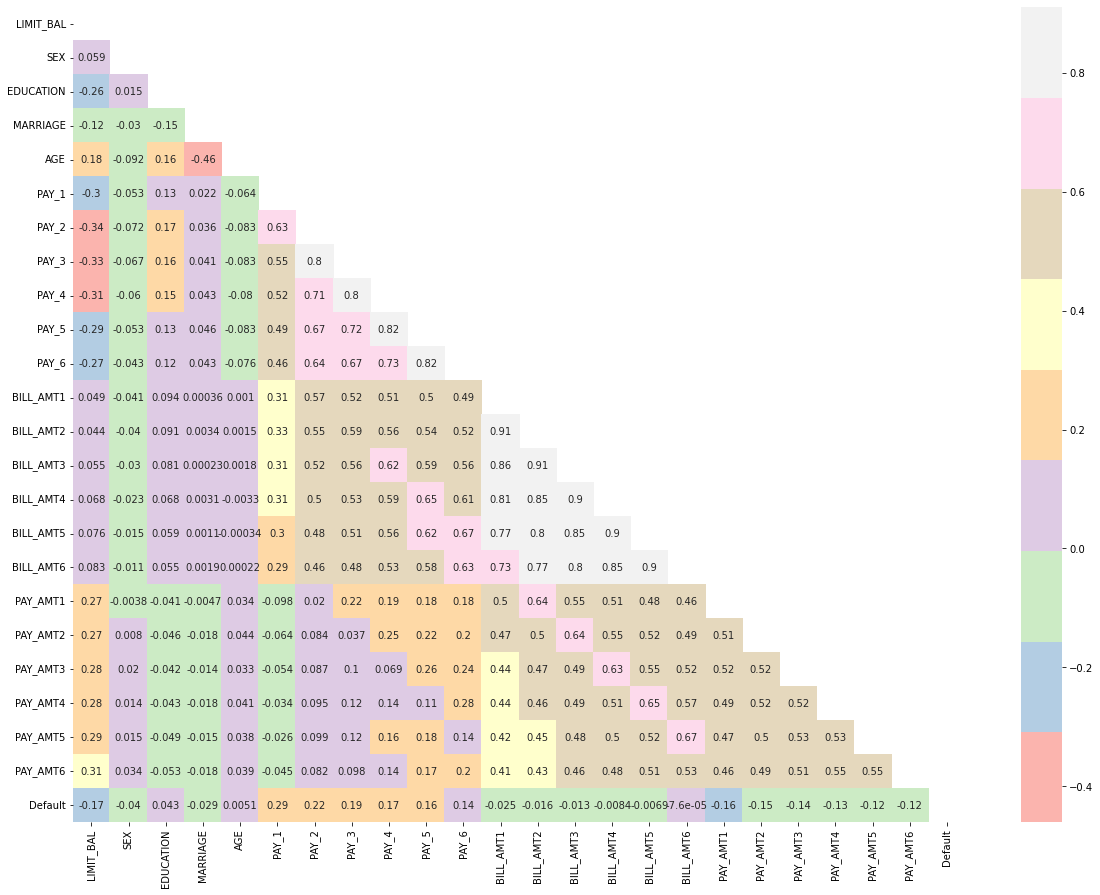

In [ ]:
corr_matrix = creditcard_df.corr(method='spearman')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Pastel1', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.show()

### Creating Model

In [ ]:
df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df_copy.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'Default'}, inplace = True)

In [ ]:
# Unique values in each categorical columns

print("SEX", df_copy.SEX.unique())
print('EDUCATION', df_copy.EDUCATION.unique())
print('PAY_1', df_copy.PAY_1.unique())
print('MARRIAGE', df_copy.MARRIAGE.unique())
print('Default', df_copy.Default.unique())

SEX [2 1]
EDUCATION [2 1 3 4]
PAY_1 [ 2 -1  0 -2  1  3  4  8  7  5  6]
MARRIAGE [1 2 3]
Default [1 0]


In [ ]:
df_copy['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

0    77.88
1    22.12
Name: Default, dtype: float64


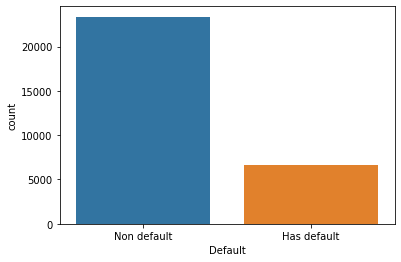

In [ ]:
print((df_copy['Default'].value_counts()/df_copy['Default'].shape)*100)
#sns.countplot(df['Default'])
g = sns.countplot(df_copy['Default'])
g.set_xticklabels(['Non default', 'Has default'])
plt.show()

* Here we can see that the data is imbalanced with 77.88% Non-default vs. 22.12% Has default.

#### Splitting the data into traim and test

In [ ]:
# Independent and Dependent Features
X=df_copy.drop("Default",axis=1)
y=df_copy.Default

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

#### Cross Validation Like KFOLD and Hyperpaqrameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#### Befor SMOTE Analysis (OverSampling)

### Logistic Regression

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

#### $Precision = \frac{TP}{(TP + FP)}$,   $Recall = \frac{TP}{(TP + FN)}$

In [ ]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5832    0]
 [1668    0]]
0.7776
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5832
           1       0.00      0.00      0.00      1668

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.78      0.68      7500



In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_X: (22500, 24)
Before OverSampling, the shape of train_y: (22500,) 



In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 4968
Before OverSampling, counts of label '0': 17532 



#### After Implementing Oversampling for Handling Imbalanced 

#### SMOTE Analysis

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
x_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (35064, 24)
After OverSampling, the shape of train_y: (35064,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 17532
After OverSampling, counts of label '0': 17532


### Logistic Regression

In [ ]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [ ]:
log_clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
log_clf.fit(x_train_res,y_train_res)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

In [ ]:
''' Predicting the test results '''

y_pred = log_clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

Accuracy: 60.55


In [ ]:
''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test,y_pred), '\n')
print('Classification report', '\n', classification_report(y_test,y_pred), '\n')

Confusion matrix 
 [[3517 2315]
 [ 644 1024]] 

Classification report 
               precision    recall  f1-score   support

           0       0.85      0.60      0.70      5832
           1       0.31      0.61      0.41      1668

    accuracy                           0.61      7500
   macro avg       0.58      0.61      0.56      7500
weighted avg       0.73      0.61      0.64      7500
 



In [ ]:
'''y_pred=log_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))'''

'y_pred=log_clf.predict(X_test)\nprint(confusion_matrix(y_test,y_pred))\nprint(accuracy_score(y_test,y_pred))\nprint(classification_report(y_test,y_pred))'

In [ ]:
# load library
'''#from sklearn.linear_model import LogisticRegression

log_class=LogisticRegression()
# fit the predictor and target
log_class.fit(x_train_res,y_train_res)'''

'#from sklearn.linear_model import LogisticRegression\n\nlog_class=LogisticRegression()\n# fit the predictor and target\nlog_class.fit(x_train_res,y_train_res)'

In [ ]:
'''#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# predict
y_pred=log_class.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))'''

'#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report\n# predict\ny_pred=log_class.predict(X_test)\nprint(confusion_matrix(y_test,y_pred))\nprint(accuracy_score(y_test,y_pred))\nprint(classification_report(y_test,y_pred))'

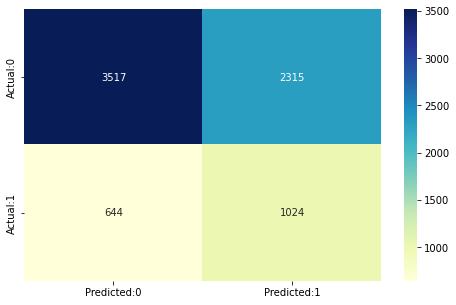

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### Stochastic Gradient Descent (SGD)
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [ ]:
# load library
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
# fit the predictor and target
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6084804995509765

In [ ]:
''' Predicting the test results '''

y_pred = sgd.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

Accuracy: 53.07


In [ ]:
''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test,y_pred), '\n')
print('Classification report', '\n', classification_report(y_test,y_pred), '\n')

Confusion matrix 
 [[2903 2929]
 [ 591 1077]] 

Classification report 
               precision    recall  f1-score   support

           0       0.83      0.50      0.62      5832
           1       0.27      0.65      0.38      1668

    accuracy                           0.53      7500
   macro avg       0.55      0.57      0.50      7500
weighted avg       0.71      0.53      0.57      7500
 



In [ ]:
'''y_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))'''

'y_pred = sgd.predict(X_test)\nprint(confusion_matrix(y_test,y_pred))\nprint(accuracy_score(y_test,y_pred))\nprint(classification_report(y_test,y_pred))'

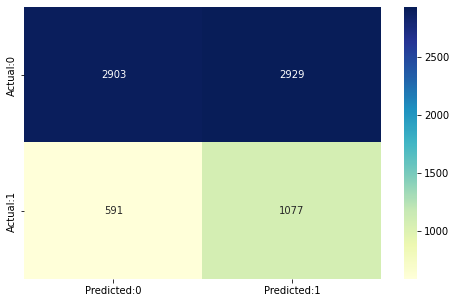

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### Random Forest Classifier

In [ ]:
# load library
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
# fit the predictor and target
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5717271861523128

In [ ]:
''' Predicting the test results '''

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

Accuracy: 81.71


In [ ]:
''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test,y_pred), '\n')
print('Classification report', '\n', classification_report(y_test,y_pred), '\n')

Confusion matrix 
 [[5526  306]
 [1066  602]] 

Classification report 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.66      0.36      0.47      1668

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500
 



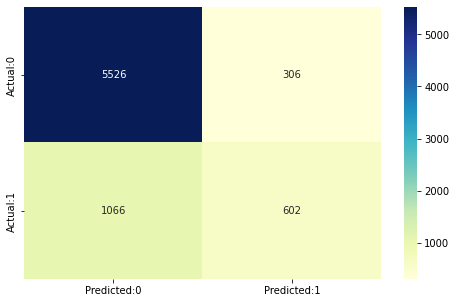

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### K Nearest Neighbor (KNN) algorithm!

In [ ]:
# load library
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    # fit the predictor and target
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

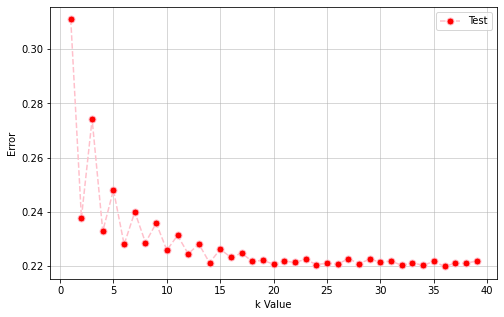

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(range(1,40),error_rate,label="Test",color='pink',linestyle='dashed', marker='o',markerfacecolor='red', markersize=7)
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [ ]:
from sklearn.metrics import roc_auc_score
Roc_auc_score = roc_auc_score(y_test, y_pred)
Roc_auc_score

0.5233294845604998

In [ ]:
''' Predicting the test results '''

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

Accuracy: 77.83


In [ ]:
''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test,y_pred), '\n')
print('Classification report', '\n', classification_report(y_test,y_pred), '\n')

Confusion matrix 
 [[5730  102]
 [1561  107]] 

Classification report 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87      5832
           1       0.51      0.06      0.11      1668

    accuracy                           0.78      7500
   macro avg       0.65      0.52      0.49      7500
weighted avg       0.72      0.78      0.70      7500
 



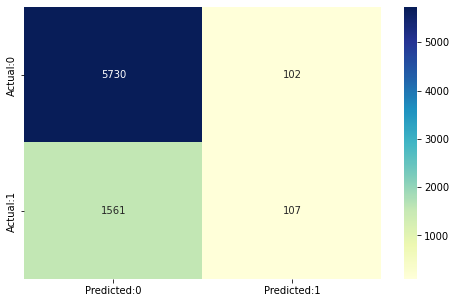

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### Support Vector Machine (SVM) algorithm!

In [ ]:
from sklearn.svm import SVC
SVM_Model = SVC(gamma='auto', kernel="rbf")

In [ ]:
SVM_Model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
acc = SVM_Model.score(X,y)*100
print('Accuracy:',round(acc,2))

Accuracy: 94.43


In [ ]:
from sklearn.metrics import roc_curve

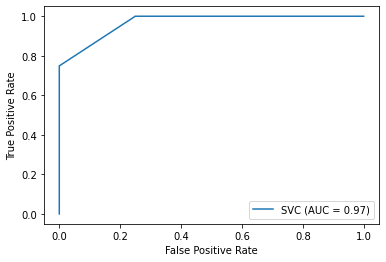

In [ ]:
# Plot ROC_AUC curve of 3 models
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
# ROC Curve:
metrics.plot_roc_curve(SVM_Model,X,y)

In [ ]:
#predict probabilities
pred_prob1 = log_clf.predict_proba(X_test)
pred_prob2 = sgd.predict_proba(X_test)
pred_prob3 = classifier.predict_proba(X_test)
pred_prob4 = knn.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

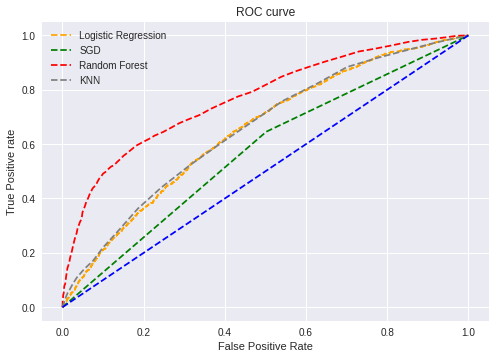

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SGD')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='grey', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Conclusion

1) Using a Logistic Regression classifier, we can predict with 60.33% accuracy, whether a customer is likely to default next month.

2) Using a Stochastic Gradient Descent classifier, we can predict with 53.07% accuracy, whether a customer is likely to default next month.

3) Using a Random Forest classifier, we can predict with 81.68% accuracy, whether a customer is likely to default next month.

4) Using a K-Nearest Neighbour classifier, we can predict with 77.83% accuracy, whether a customer is likely to default next month.

5) Using a Support Vector Machine classifier, we can predict with 94.43% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

We found that using Random Forest classifier and Support Vector Machine classifier are better.

Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.